## Observations and Insights 

In [55]:
 %matplotlib notebook

In [56]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_results_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combine_results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [63]:
# Checking the number of mice.
print(f"There are {combine_results_df['Mouse ID'].nunique()} mice")

There are 249 mice


In [58]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_df = combine_results_df[combine_results_df[["Mouse ID", "Timepoint"]].duplicated() == True]

duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [59]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = combine_results_df[combine_results_df[["Mouse ID", "Timepoint"]].duplicated(keep="last") == True]

duplicate_mice_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1


In [60]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_df = combine_results_df[combine_results_df["Mouse ID"] != 'g989']

In [62]:
# Checking the number of mice in the clean DataFrame.
print(f"There are {cleaned_mouse_df['Mouse ID'].nunique()} unique mice once the mouse with duplicate data is removed")


There are 248 unique mice once the mouse with duplicate data is removed


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_stats_df = cleaned_mouse_df.groupby("Drug Regimen")

mean_tv = summary_stats_df["Tumor Volume (mm3)"].mean()

median_tv = summary_stats_df["Tumor Volume (mm3)"].median()

var_tv = summary_stats_df["Tumor Volume (mm3)"].var()

std_tv = summary_stats_df["Tumor Volume (mm3)"].std()

sem_tv = summary_stats_df["Tumor Volume (mm3)"].sem()

summary_stats_df = pd.DataFrame({"Mean Tumor Volume": mean_tv,
                                "Median Tumor Volume": median_tv,
                                "Variance in Tumor Volume": var_tv,
                                "Standard Deviation of Tumor Volume": std_tv,
                                "SEM of Tumor Volume":sem_tv})

summary_stats_df["Mean Tumor Volume"] = summary_stats_df["Mean Tumor Volume"].map("{0:,.2f}mm3".format)
summary_stats_df["Median Tumor Volume"] = summary_stats_df["Median Tumor Volume"].map("{0:,.2f}mm3".format)
summary_stats_df["Variance in Tumor Volume"] = summary_stats_df["Variance in Tumor Volume"].map("{0:,.2f}mm3".format)
summary_stats_df["Standard Deviation of Tumor Volume"] = summary_stats_df["Standard Deviation of Tumor Volume"].map("{0:,.2f}mm3".format)
summary_stats_df["SEM of Tumor Volume"] = summary_stats_df["SEM of Tumor Volume"].map("{0:,.2f}mm3".format)

summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Variance in Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68mm3,41.56mm3,24.95mm3,4.99mm3,0.33mm3
Ceftamin,52.59mm3,51.78mm3,39.29mm3,6.27mm3,0.47mm3
Infubinol,52.88mm3,51.82mm3,43.13mm3,6.57mm3,0.49mm3
Ketapril,55.24mm3,53.70mm3,68.55mm3,8.28mm3,0.60mm3
Naftisol,54.33mm3,52.51mm3,66.17mm3,8.13mm3,0.60mm3
Placebo,54.03mm3,52.29mm3,61.17mm3,7.82mm3,0.58mm3
Propriva,52.32mm3,50.45mm3,43.85mm3,6.62mm3,0.54mm3
Ramicane,40.22mm3,40.67mm3,23.49mm3,4.85mm3,0.32mm3
Stelasyn,54.23mm3,52.43mm3,59.45mm3,7.71mm3,0.57mm3


## Bar and Pie Charts

<IPython.core.display.Javascript object>


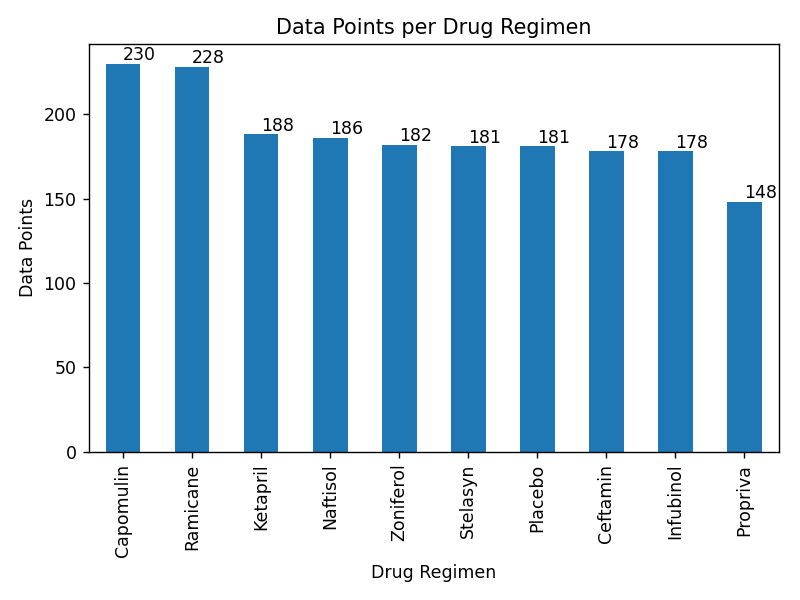

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

drug_data = cleaned_mouse_df["Drug Regimen"].value_counts()

mouse_plot = drug_data.plot(kind="bar")

for index,value in enumerate(drug_data):
    mouse_plot.annotate(value,(index, value), xytext=(0,2),textcoords='offset points')


plt.title("Data Points per Drug Regimen")
plt.ylabel("Data Points")
plt.xlabel("Drug Regimen")

plt.tight_layout()

<IPython.core.display.Javascript object>


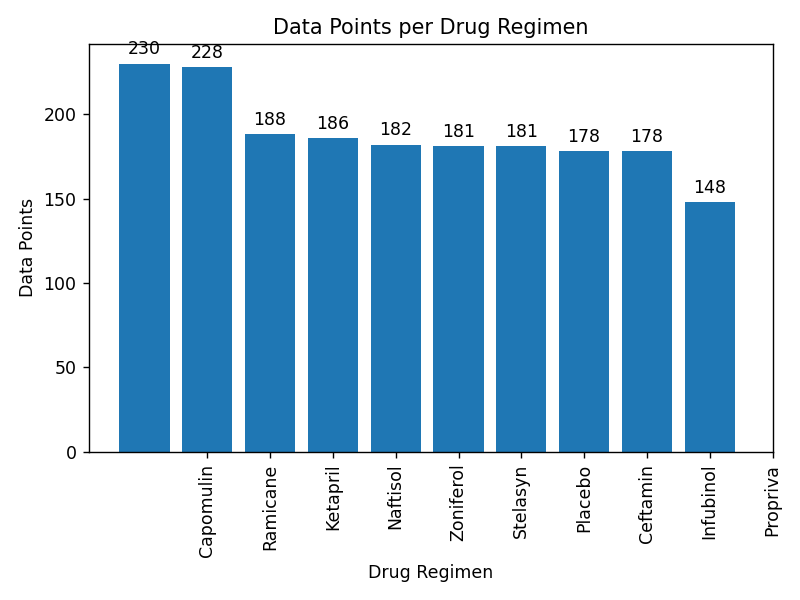

In [74]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

drug_data = cleaned_mouse_df.sort_values("Drug Regimen")["Drug Regimen"].value_counts()

drug_names = cleaned_mouse_df.sort_values("Drug Regimen")["Drug Regimen"].unique()


index= np.arange(len(drug_data.index))

width= 1
fig, ax = plt.subplots()
drugs1 = ax.bar(index - width, drug_data)

ax.set_ylabel("Data Points")
ax.set_xlabel("Drug Regimen")
ax.set_title("Data Points per Drug Regimen")
ax.set_xticks(index)
plt.xticks(rotation=90)
ax.set_xticklabels(drug_data.index)

def autolabel(drugs, xpos='center'):
    
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for drug in drugs:
        height = drug.get_height()
        ax.annotate('{}'.format(height),
                    xy=(drug.get_x() + drug.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(drugs1)


fig.tight_layout()

<IPython.core.display.Javascript object>


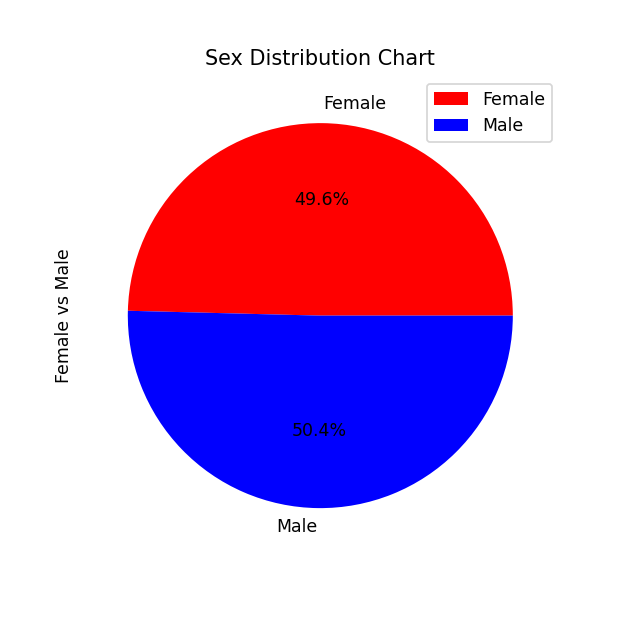

Text(0.5, 1.0, 'Sex Distribution Chart')

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
male_mouse = cleaned_mouse_df.loc[cleaned_mouse_df["Sex"]=="Male", "Mouse ID"].nunique()
female_mouse = cleaned_mouse_df.loc[cleaned_mouse_df["Sex"]=="Female", "Mouse ID"].nunique()

sex_dist_df = pd.DataFrame ({"Female vs Male": [female_mouse, male_mouse]},
                           index=["Female","Male"])

colors = ["red", "blue"]
plot = sex_dist_df.plot.pie(y="Female vs Male", figsize=(5,5), colors=colors, autopct="%1.1f%%")

plt.title("Sex Distribution Chart")


<IPython.core.display.Javascript object>


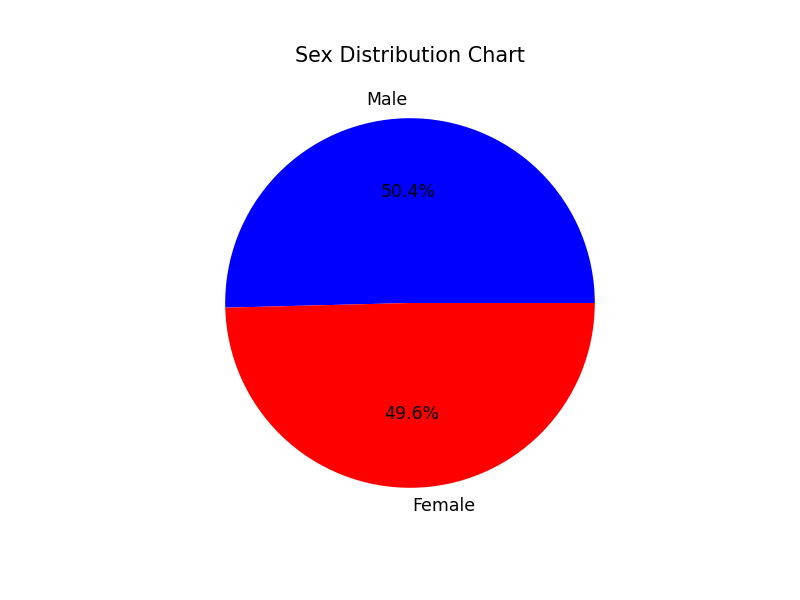

Text(0.5, 1.0, 'Sex Distribution Chart')

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_dist = [cleaned_mouse_df.loc[cleaned_mouse_df["Sex"]=="Male", "Mouse ID"].nunique(), cleaned_mouse_df.loc[cleaned_mouse_df["Sex"]=="Female", "Mouse ID"].nunique()]
sex = ["Male", "Female"]
colors = ["blue", "red"]

plt.pie(sex_dist, labels=sex, colors=colors, autopct="%1.1f%%")

plt.title("Sex Distribution Chart")


## Quartiles, Outliers and Boxplots

In [44]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
target_drugs_df = cleaned_mouse_df.loc[:, ("Mouse ID",
                                           "Drug Regimen",
                                           "Sex",
                                           "Age_months",
                                           "Weight (g)",
                                           "Timepoint",
                                           "Tumor Volume (mm3)",
                                           "Metastatic Sites")]

placebo = target_drugs_df[target_drugs_df["Drug Regimen"] == "Placebo"].index
zoniferol = target_drugs_df[target_drugs_df["Drug Regimen"] == "Zoniferol"].index
propriva = target_drugs_df[target_drugs_df["Drug Regimen"] == "Propriva"].index
stelasyn = target_drugs_df[target_drugs_df["Drug Regimen"] == "Stelasyn"].index
naftisol = target_drugs_df[target_drugs_df["Drug Regimen"] == "Naftisol"].index
ketapril = target_drugs_df[target_drugs_df["Drug Regimen"] == "Ketapril"].index




target_drugs_df.drop(placebo, inplace=True)
target_drugs_df.drop(zoniferol, inplace=True)
target_drugs_df.drop(propriva, inplace=True)
target_drugs_df.drop(stelasyn, inplace=True)
target_drugs_df.drop(naftisol, inplace=True)
target_drugs_df.drop(ketapril, inplace=True)


# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint_df = target_drugs_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_tumor_vol_df = pd.merge(greatest_timepoint_df, target_drugs_df, how="left", on=("Mouse ID", "Timepoint"))

last_tumor_vol_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
#treatments_list = ["Ramicane", "Capomulin", "Ceftamin", "Infubinol"]


# Create empty list to fill with tumor vol data (for plotting)
#tumor_vol_list = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
#for index, rows in merged_time_df.iterrows():
    
    #drug_list = [rows["Drug Regimen"], rows["Tumor Volume (mm3)"]]
    
    #tumor_vol_list.append(drug_list)    

#print(tumor_vol_list)    
    # add subset 
#ramicane = pd.DataFrame.lookup(tumor_vol_list["Ramicane"])
    # Determine outliers using upper and lower bounds
 

In [46]:
#Ramicane Quantiles and Outliers Without Loop
ramicane = last_tumor_vol_df.loc[last_tumor_vol_df["Drug Regimen"]=="Ramicane"]["Tumor Volume (mm3)"]
ramicane_lowerq = ramicane.quantile(0.25)
ramicane_medq = ramicane.quantile(0.5)
ramicane_upperq = ramicane.quantile(0.75)
ramicane_iqr = ramicane_upperq-ramicane_lowerq
ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)

print(f"The lower quartile of Ramicane tumor volumes is: {round(float(ramicane_lowerq),2)}")
print(f"The upper quartile of  Ramicane tumor volumes is: {round(float(ramicane_upperq),2)}")
print(f"The interquartile range of Ramicane tumor volumes is: {round(float(ramicane_iqr),2)}")
print(f"The the median of Ramicane tumor volumes is: {round(float(ramicane_medq),2)} ")
print(f"Values below {round(float(ramicane_lower_bound),2)} could be outliers.")
print(f"Values above {round(float(ramicane_upper_bound),2)} could be outliers.")

The lower quartile of Ramicane tumor volumes is: 31.56
The upper quartile of  Ramicane tumor volumes is: 40.66
The interquartile range of Ramicane tumor volumes is: 9.1
The the median of Ramicane tumor volumes is: 36.56 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.


In [47]:
#Capomulin Quantiles and Outliers Without Loop
capomulin = last_tumor_vol_df.loc[last_tumor_vol_df["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"]
capomulin_lowerq = capomulin.quantile(0.25)
capomulin_medq = capomulin.quantile(0.5)
capomulin_upperq = capomulin.quantile(0.75)
capomulin_iqr = capomulin_upperq-capomulin_lowerq
capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)

print(f"The lower quartile of Capomulin tumor volumes is: {round(float(capomulin_lowerq),2)}")
print(f"The upper quartile of  Capomulin tumor volumes is: {round(float(capomulin_upperq),2)}")
print(f"The interquartile range of Capomulin tumor volumes is: {round(float(capomulin_iqr),2)}")
print(f"The the median of Capomulin tumor volumes is: {round(float(capomulin_medq),2)} ")
print(f"Values below {round(float(capomulin_lower_bound),2)} could be outliers.")
print(f"Values above {round(float(capomulin_upper_bound),2)} could be outliers.")


The lower quartile of Capomulin tumor volumes is: 32.38
The upper quartile of  Capomulin tumor volumes is: 40.16
The interquartile range of Capomulin tumor volumes is: 7.78
The the median of Capomulin tumor volumes is: 38.13 
Values below 20.7 could be outliers.
Values above 51.83 could be outliers.


In [48]:
#Ceftamin Quantiles and Outliers Without Loop
ceftamin = last_tumor_vol_df.loc[last_tumor_vol_df["Drug Regimen"]=="Ceftamin"]["Tumor Volume (mm3)"]
ceftamin_lowerq = ceftamin.quantile(0.25)
ceftamin_medq = ceftamin.quantile(0.5)
ceftamin_upperq = ceftamin.quantile(0.75)
ceftamin_iqr = ceftamin_upperq-ceftamin_lowerq
ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)

print(f"The lower quartile of Ceftamin tumor volumes is: {round(float(ceftamin_lowerq),2)}")
print(f"The upper quartile of  Ceftamin tumor volumes is: {round(float(ceftamin_upperq),2)}")
print(f"The interquartile range of Ceftamin tumor volumes is: {round(float(ceftamin_iqr),2)}")
print(f"The the median of Ceftamin tumor volumes is: {round(float(ceftamin_medq),2)} ")
print(f"Values below {round(float(ceftamin_lower_bound),2)} could be outliers.")
print(f"Values above {round(float(ceftamin_upper_bound),2)} could be outliers.")


The lower quartile of Ceftamin tumor volumes is: 48.72
The upper quartile of  Ceftamin tumor volumes is: 64.3
The interquartile range of Ceftamin tumor volumes is: 15.58
The the median of Ceftamin tumor volumes is: 59.85 
Values below 25.36 could be outliers.
Values above 87.67 could be outliers.


In [49]:
#Infubinol Quantiles and Outliers Without Loop
infubinol = last_tumor_vol_df.loc[last_tumor_vol_df["Drug Regimen"]=="Infubinol"]["Tumor Volume (mm3)"]
infubinol_lowerq = infubinol.quantile(0.25)
infubinol_medq = infubinol.quantile(0.5)
infubinol_upperq = infubinol.quantile(0.75)
infubinol_iqr = infubinol_upperq-infubinol_lowerq
infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)

print(f"The lower quartile of Infubinol tumor volumes is: {round(float(infubinol_lowerq),2)}")
print(f"The upper quartile of  Infubinol tumor volumes is: {round(float(infubinol_upperq),2)}")
print(f"The interquartile range of Infubinol tumor volumes is: {round(float(infubinol_iqr),2)}")
print(f"The the median of Infubinol tumor volumes is: {round(float(infubinol_medq),2)} ")
print(f"Values below {round(float(infubinol_lower_bound),2)} could be outliers.")
print(f"Values above {round(float(infubinol_upper_bound),2)} could be outliers.")


The lower quartile of Infubinol tumor volumes is: 54.05
The upper quartile of  Infubinol tumor volumes is: 65.53
The interquartile range of Infubinol tumor volumes is: 11.48
The the median of Infubinol tumor volumes is: 60.17 
Values below 36.83 could be outliers.
Values above 82.74 could be outliers.


<IPython.core.display.Javascript object>


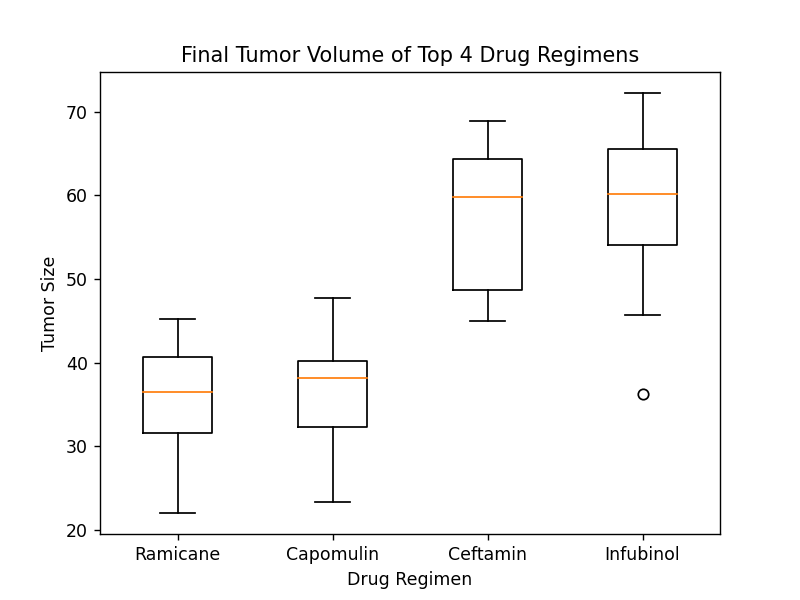

In [64]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()

data = [ramicane, capomulin, ceftamin, infubinol]

labels = ['Ramicane', 'Capomulin', 'Ceftamin', 'Infubinol']

ax1.set_title('Final Tumor Volume of Top 4 Drug Regimens')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Size')
ax1.boxplot(data, labels=labels)

plt.show()

## Line and Scatter Plots

<IPython.core.display.Javascript object>


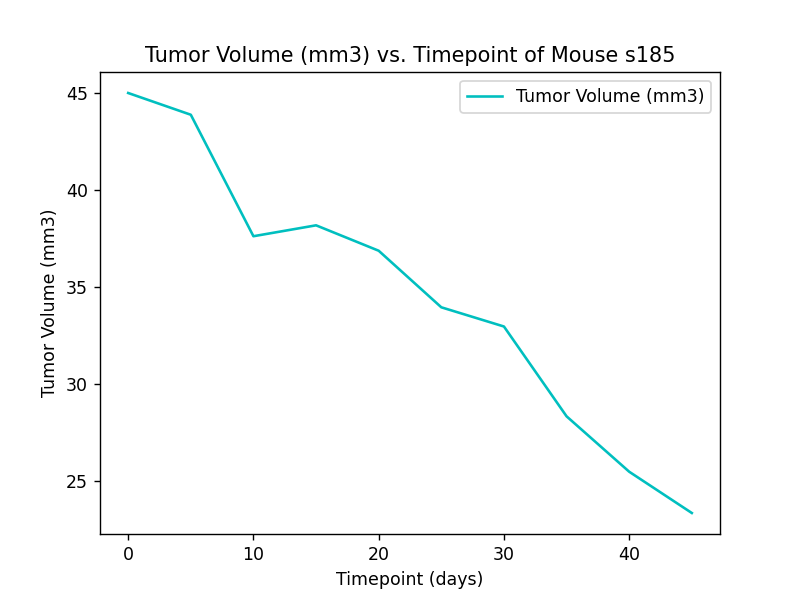

In [95]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_data = cleaned_mouse_df.loc[cleaned_mouse_df["Drug Regimen"]=="Capomulin"]
capomulin_mouse_id = capomulin_data.iloc[0,0]
capomulin_mouse_df = capomulin_data.loc[capomulin_data["Mouse ID"] == capomulin_mouse_id, ["Timepoint", "Tumor Volume (mm3)"]]

capomulin_mouse_df.plot(x ='Timepoint', y='Tumor Volume (mm3)', kind = 'line', color = "c", title="Tumor Volume (mm3) vs. Timepoint of Mouse " + capomulin_mouse_id)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
